In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')


Mounted at /content/drive


In [34]:
import pandas as pd

# Replace the path with the correct one if needed
file_path = '/content/drive/MyDrive/Subgraph.csv'

# Define column names

# Read the file into a DataFrame
DF = pd.read_csv(file_path)

# Display the DataFrame
DF.head()

,ID1,ID2
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6


In [3]:
from google.colab import files
files.upload()  # Select and upload the kaggle.json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alirezaakhavansafaei","key":"7a1024303e3fdd5f892634f1f6326f03"}'}

In [4]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/


In [5]:
!kaggle datasets download -d wolfram77/graphs-snap-higgs-twitter -p /content


100% 120M/120M [00:05<00:00, 28.3MB/s]
100% 120M/120M [00:05<00:00, 21.3MB/s]


In [6]:
import zipfile

with zipfile.ZipFile('/content/graphs-snap-higgs-twitter.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')


In [7]:
import pandas as pd

# Replace the path with the correct one if needed
file_path = '/content/higgs-activity_time.txt'

# Define column names
columns = ['id1', 'id2', 'timestamp', 'action']

# Read the file into a DataFrame
df = pd.read_csv(file_path, sep=' ', header=None, names=columns)

# Display the DataFrame
df.head()

,id1,id2,timestamp,action
0,223789,213163,1341100972,MT
1,223789,213163,1341100972,RE
2,376989,50329,1341101181,RT
3,26375,168366,1341101183,MT
4,376989,13813,1341101192,RT


In [8]:
import pandas as pd

# Assuming you have already defined Df and df

# Find all unique IDs in Df (ID1 + ID2 set)
unique_ids_set = set(DF['ID1']).union(set(DF['ID2']))

# Filter df to keep only records with valid IDs in id1 or id2
df_filtered = df[df['id1'].isin(unique_ids_set) & df['id2'].isin(unique_ids_set)]

# Display the filtered DataFrame
df_filtered

,id1,id2,timestamp,action
0,223789,213163,1341100972,MT
1,223789,213163,1341100972,RE
7,99258,50329,1341101263,RT
12,75083,84647,1341101732,RT
13,75083,42182,1341101732,MT
...,...,...,...,...
563055,85314,85314,1341705426,MT
563058,9021,80429,1341705452,MT
563059,9021,80429,1341705452,RE
563065,19979,49694,1341705552,MT


In [9]:
df=df_filtered
df.head()

,id1,id2,timestamp,action
0,223789,213163,1341100972,MT
1,223789,213163,1341100972,RE
7,99258,50329,1341101263,RT
12,75083,84647,1341101732,RT
13,75083,42182,1341101732,MT


In [10]:
# Function to print a dictionary up to a specified number of records
def print_dictionary(dictionary, limit=100):
    print("{")
    count = 0
    for key, value in dictionary.items():
        if count >= limit:
            break
        print(f"    {key}: {value}")
        count += 1
    print("}")


In [11]:
# Assuming you have already read the file and have the pandas DataFrame 'df'

# Initialize the dictionaries to store the results
MT_dict = {}
RT_dict = {}
RE_dict = {}
merged_dict = {}
total_dict = {}

# Set the number of records to process before printing the progress
records_to_print = 1000
processed_records = 0
total_records = len(df)

# Loop over the DataFrame
for index, row in df.iterrows():
    if row['action'] == 'MT':
        key = row['id2']
        value = row['id1']


        # Check if the key exists in the dictionary, if not, initialize an empty list
        if key not in MT_dict:
            MT_dict[key] = []

        # Append the value to the list
        MT_dict[key].append(value)

        # Update the merged dictionary with the value and prefix
        if key not in merged_dict:
            merged_dict[key] =[]

        merged_dict[key].append(f"MT-{value}")
        if key not in total_dict:
            total_dict[key] =[]

        total_dict[key].append(value)
    elif row['action'] == 'RT':
        key = row['id2']
        value = row['id1']

        # Check if the key exists in the dictionary, if not, initialize an empty list
        if key not in RT_dict:
            RT_dict[key] = []

        # Append the value to the list
        RT_dict[key].append(value)

        # Update the merged dictionary with the value and prefix
        if key not in merged_dict:
            merged_dict[key] =[]
        merged_dict[key].append(f"RT-{value}")
        if key not in total_dict:
            total_dict[key] =[]

        total_dict[key].append(value)
    elif row['action'] == 'RE':
        key = row['id2']
        value = row['id1']

        # Check if the key exists in the dictionary, if not, initialize an empty list
        if key not in RE_dict:
            RE_dict[key] = []

        # Append the value to the list
        RE_dict[key].append(value)

        # Update the merged dictionary with the value and prefix
        if key not in merged_dict:
            merged_dict[key] =[]
        merged_dict[key].append(f"RE-{value}")
        if key not in total_dict:
            total_dict[key] =[]

        total_dict[key].append(value)

    processed_records += 1
    if processed_records % records_to_print == 0 or processed_records == total_records:
        percentage_complete = (processed_records / total_records) * 100
        print(f'\rProgress: {percentage_complete:.2f}%  ', end='')

# Display the merged dictionary
print("\nMerged Dictionary:")
print_dictionary(merged_dict, limit=10)
print("\nTotal Dictionary:")
print_dictionary(total_dict, limit=10)

Progress: 100.00%  
Merged Dictionary:
{
    213163: ['MT-223789', 'RE-223789', 'MT-213163', 'MT-246023', 'RE-246023', 'MT-213163']
    50329: ['RT-99258', 'RT-56426', 'RT-153793', 'RT-184805', 'RT-832', 'RT-30184', 'RT-832', 'RT-56426', 'RT-84647', 'RT-36417', 'MT-50191', 'MT-832', 'MT-26129', 'MT-9952']
    84647: ['RT-75083', 'MT-3604', 'RT-3933', 'MT-68939', 'MT-64367', 'RT-42180', 'MT-44086', 'RT-3604', 'RT-22814', 'MT-22814', 'MT-11953', 'RT-11953', 'MT-6793', 'MT-11953', 'RT-88838']
    42182: ['MT-75083', 'MT-89805', 'RT-6072', 'RT-103447', 'MT-89805', 'MT-89805', 'MT-89805', 'MT-6072', 'RE-6072', 'RT-6072', 'RT-56968', 'MT-89805', 'RT-39885', 'RT-35604', 'MT-92274', 'MT-92274', 'RT-25661', 'MT-89805', 'MT-42182', 'RT-6072', 'MT-42172', 'RT-116270', 'MT-89805', 'MT-11991', 'MT-56968', 'MT-6072', 'RE-6072', 'RT-96198', 'MT-1276', 'RT-4182', 'RT-86501', 'RT-136057', 'RT-44086', 'MT-2373', 'MT-89805', 'RT-65926', 'RT-31022', 'RT-35604', 'RT-175264', 'MT-2527', 'RT-39885', 'MT-6361

In [12]:
# Assuming you have already read the file and have the pandas DataFrame 'df'

# Initialize the dictionaries to store the results
mention_dict = {}
retweet_dict = {}
reply_dict = {}
merged = {}
total = {}

# Set the number of records to process before printing the progress
records_to_print = 1000
processed_records = 0
total_records = len(df)

# Loop over the DataFrame
for index, row in df.iterrows():
    if row['action'] == 'MT':
        key = row['id1']
        value = row['id2']

        # Check if the key exists in the dictionary, if not, initialize an empty list
        if key not in mention_dict:
            mention_dict[key] = []

        # Append the value to the list
        mention_dict[key].append(value)

        # Update the merged dictionary with the value and prefix
        if key not in merged:
            merged[key] =[]

        merged[key].append(f"MT-{value}")
        if key not in total:
            total[key] =[]

        total[key].append(value)
    elif row['action'] == 'RT':
        key = row['id1']
        value = row['id2']

        # Check if the key exists in the dictionary, if not, initialize an empty list
        if key not in retweet_dict:
            retweet_dict[key] = []

        # Append the value to the list
        retweet_dict[key].append(value)

        # Update the merged dictionary with the value and prefix
        if key not in merged:
            merged[key] =[]
        merged[key].append(f"RT-{value}")
        if key not in total:
            total[key] =[]

        total[key].append(value)
    elif row['action'] == 'RE':
        key = row['id1']
        value = row['id2']

        # Check if the key exists in the dictionary, if not, initialize an empty list
        if key not in reply_dict:
            reply_dict[key] = []

        # Append the value to the list
        reply_dict[key].append(value)

        # Update the merged dictionary with the value and prefix
        if key not in merged:
            merged[key] =[]
        merged[key].append(f"RE-{value}")
        if key not in total:
            total[key] =[]

        total[key].append(value)

    processed_records += 1
    if processed_records % records_to_print == 0 or processed_records == total_records:
        percentage_complete = (processed_records / total_records) * 100
        print(f'\rProgress: {percentage_complete:.2f}%  ', end='')

# Display the merged dictionary
print("\nMerged Dictionary:")
print_dictionary(merged, limit=10)
print("\nTotal Dictionary:")
print_dictionary(total, limit=10)

Progress: 100.00%  
Merged Dictionary:
{
    223789: ['MT-213163', 'RE-213163', 'RT-251638', 'RT-88', 'MT-66977', 'MT-2994', 'MT-138464', 'RE-138464', 'RT-138464']
    99258: ['RT-50329']
    75083: ['RT-84647', 'MT-42182', 'MT-13808', 'RT-11876', 'MT-39564', 'RE-39564', 'MT-88', 'MT-3998', 'RE-3998', 'RT-30324', 'RT-30324', 'RT-88', 'MT-88', 'RT-26158', 'RT-5137', 'RT-349', 'RT-349', 'MT-349', 'RE-349', 'MT-553', 'RE-553', 'MT-88', 'RT-3998', 'MT-13813', 'MT-88', 'RT-3998', 'RT-56968', 'MT-88', 'RT-27311', 'MT-677', 'MT-553', 'RE-553', 'MT-3027', 'MT-3027', 'RT-11991', 'RT-88', 'RT-2567', 'RT-49007', 'MT-468', 'RT-2941', 'RT-2941', 'MT-24704', 'RT-5079', 'MT-88', 'RT-88', 'MT-64911', 'MT-52087', 'MT-50595', 'RT-3237']
    10284: ['MT-2417', 'MT-10375', 'RT-1298', 'MT-1298', 'RT-383', 'RT-6119', 'RT-26514', 'RT-26514']
    5393: ['MT-26637', 'MT-5393', 'MT-7414', 'MT-33666']
    50219: ['MT-4665', 'MT-26398', 'RT-4665', 'MT-63931', 'MT-4665', 'RT-4665', 'MT-4665', 'MT-27484', 'MT-4665'

In [13]:
import pandas as pd
import networkx as nx

# Replace the path with the correct one if needed
file_path = '/content/drive/MyDrive/Subgraph.csv'

# Read the file into a DataFrame
DF = pd.read_csv(file_path)

# Create a directed graph from the edge list
G = nx.from_pandas_edgelist(DF, source='ID1', target='ID2', create_using=nx.DiGraph())



In [14]:
# Get the adjacency list representation
adjacency_list = G.adjacency()

# Convert the adjacency list to a dictionary of lists
adjacency_dict = {node: [neighbor for neighbor in neighbors] for node, neighbors in adjacency_list}
followings_dict=adjacency_dict
print(adjacency_dict)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [15]:
import pandas as pd
import networkx as nx

# Replace the path with the correct one if needed
file_path = '/content/drive/MyDrive/Subgraph.csv'

# Read the file into a DataFrame
DF = pd.read_csv(file_path)

# Create a directed graph from the edge list
G = nx.from_pandas_edgelist(DF, source='ID2', target='ID1', create_using=nx.DiGraph())



In [16]:
# Get the adjacency list representation
adjacency_list = G.adjacency()

# Convert the adjacency list to a dictionary of lists
adjacency_dict = {node: [neighbor for neighbor in neighbors] for node, neighbors in adjacency_list}
followers_dict=adjacency_dict
print(adjacency_dict)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [17]:
def s3(ID1, ID2, followers): #normalized to max len of 2 ids
    # Get the lists of followers for the given user IDs
    followers_list_1 = followers.get(ID1, [])
    followers_list_2 = followers.get(ID2, [])

    # Find the common followers using set intersection
    common_followers = set(followers_list_1).intersection(followers_list_2)
    n=max(len(followers_list_1),len(followers_list_2))
    # Calculate the ratio of common followers to n
    ratio = len(common_followers) / n

    return ratio


In [18]:
def s2(ID1, ID2, followings): #normalized to max len of 2 ids
    # Get the lists of followers for the given user IDs
    followings_list_1 = followings.get(ID1, [])
    followings_list_2 = followings.get(ID2, [])

    # Find the common followings using set intersection
    common_followings = set(followings_list_1).intersection(followings_list_2)
    n=max(len(followings_list_1),len(followings_list_2))

    # Calculate the ratio of common followers to n
    ratio = len(common_followings) / n

    return ratio


In [19]:
def S1(ID1, ID2, followers_dict):
    # Get the lists of followers for the given user IDs
    followers_list_1 = followers_dict.get(ID1, [])
    followers_list_2 = followers_dict.get(ID2, [])

    # Check if ID1 follows ID2 and ID2 follows ID1
    if ID1 in followers_list_2 and ID2 in followers_list_1:
        return 1.0  # Both follow each other, similarity score = 1
    elif ID1 in followers_list_2 or ID2 in followers_list_1:
        return 0.5  # Only one follows the other, similarity score = 0.5
    else:
        return 0.0  # None follows the other, similarity score = 0


In [20]:
import math

def S5(i, j, reply_dict):
    # Get the lists of users that i and j replied to
    users_replied_to_i = reply_dict.get(i, [])
    users_replied_to_j = reply_dict.get(j, [])

    # Find the common users replied to by both i and j
    common_replied_users = set(users_replied_to_i).intersection(users_replied_to_j)

    # Calculate the numerator (number of common replied users)
    numerator = len(common_replied_users)

    # Calculate the denominator (squared root of (number of users i replied to * number of users j replied to))
    denominator = math.sqrt(len(users_replied_to_i) * len(users_replied_to_j))

    # Get the lists of users that i replied to and j replied to
    replies_i = reply_dict.get(i, [])
    replies_j = reply_dict.get(j, [])

    # Count the number of times j appears in replies_i and i appears in replies_j
    count_i_to_j = replies_i.count(j)
    count_j_to_i = replies_j.count(i)

    # Calculate the total number of replies for users i and j
    total_replies_i = len(replies_i)
    total_replies_j = len(replies_j)

    # Calculate the similarity score as described
    if (total_replies_i + total_replies_j)==0:
      similarity_score1=0
    else:
      similarity_score1 = (count_i_to_j + count_j_to_i) / (total_replies_i + total_replies_j)

    # Calculate the similarity score
    if denominator==0:
      similarity_score2=0
    else:
      similarity_score2 = numerator / denominator

    #total score
    similarity_score=similarity_score1+similarity_score2

    return similarity_score


In [21]:
import math

def S4(i, j, mention_dict):
    # Get the lists of users that i and j mentioned to
    users_mentioned_to_i = mention_dict.get(i, [])
    users_mentioned_to_j = mention_dict.get(j, [])

    # Find the common users mentioned to by both i and j
    common_mentioned_users = set(users_mentioned_to_i).intersection(users_mentioned_to_j)

    # Calculate the numerator (number of common mentioned users)
    numerator = len(common_mentioned_users)

    # Calculate the denominator (squared root of (number of users i mentioned to * number of users j mentioned to))
    denominator = math.sqrt(len(users_mentioned_to_i) * len(users_mentioned_to_j))

    # Get the lists of users that i mentioned to and j mentioned to
    mentions_i = mention_dict.get(i, [])
    mentions_j = mention_dict.get(j, [])

    # Count the number of times j appears in mentions_i and i appears in mentions_j
    count_i_to_j = mentions_i.count(j)
    count_j_to_i = mentions_j.count(i)

    # Calculate the total number of mentions for users i and j
    total_mentions_i = len(mentions_i)
    total_mentions_j = len(mentions_j)

    # Calculate the similarity score as described
    if (total_mentions_i + total_mentions_j)==0:
      similarity_score1=0
    else:
      similarity_score1 = (count_i_to_j + count_j_to_i) / (total_mentions_i + total_mentions_j)

    # Calculate the similarity score
    if denominator==0:
      similarity_score2=0
    else:
      similarity_score2 = numerator / denominator

    #total score
    similarity_score=similarity_score1+similarity_score2

    return similarity_score


In [22]:
import math

def S6(i, j, retweet_dict):
    # Get the lists of users that i and j retweet to
    users_retweet_to_i = retweet_dict.get(i, [])
    users_retweet_to_j = retweet_dict.get(j, [])

    # Find the common users retweet to by both i and j
    common_retweet_users = set(users_retweet_to_i).intersection(users_retweet_to_j)

    # Calculate the numerator (number of common retweet users)
    numerator = len(common_retweet_users)

    # Calculate the denominator (squared root of (number of users i retweet to * number of users j retweet to))
    denominator = math.sqrt(len(users_retweet_to_i) * len(users_retweet_to_j))

    # Get the lists of users that i mentioned to and j mentioned to
    retweet_i = retweet_dict.get(i, [])
    retweet_j = retweet_dict.get(j, [])

    # Count the number of times j appears in mentions_i and i appears in mentions_j
    count_i_to_j = retweet_i.count(j)
    count_j_to_i = retweet_j.count(i)

    # Calculate the total number of mentions for users i and j
    total_retweet_i = len(retweet_i)
    total_retweet_j = len(retweet_j)

    # Calculate the similarity score as described
    if (total_retweet_i + total_retweet_j)==0:
      similarity_score1=0
    else:
      similarity_score1 = (count_i_to_j + count_j_to_i) / (total_retweet_i + total_retweet_j)

    # Calculate the similarity score
    if denominator==0:
      similarity_score2=0
    else:
      similarity_score2 = numerator / denominator

    #total score
    similarity_score=similarity_score1+similarity_score2

    return similarity_score


In [23]:
def combined_similarity(ID1, ID2, followers_dict,followings_dict, reply_dict,retweet_dict,mention_dict):
    sc1 = S1(ID1, ID2, followers_dict)
    sc2 = s2(ID1, ID2, followings_dict)
    sc3 = s3(ID1, ID2, followers_dict)
    sc4 = S4(ID1, ID2, mention_dict)
    sc5 = S5(ID1, ID2, reply_dict)
    sc6 = S6(ID1, ID2, retweet_dict)

    combined_score = sc1 + sc2 + sc3 + sc4 + sc5 + sc6
    if ID1==ID2:
      combined_score=0
    return combined_score

In [26]:
DF.head()

,ID1,ID2
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6


In [36]:
from tqdm import tqdm

# communities is a list of lists containing the IDs of each community
# For example, communities = [['ID1', 'ID2', ...], ['ID3', 'ID4', ...], ...]

# Create a dictionary to map community index to cluster name

# Get the total number of records in new_df
total_records = len(DF)

# Create a progress bar using tqdm
progress_bar = tqdm(total=total_records, desc="Processing", unit="record", dynamic_ncols=True)

# Loop over new_df and update the 'cluster' column using the community names
for index, row in DF.iterrows():
    weight = combined_similarity(row['ID1'], row['ID2'], followers_dict,followings_dict, reply_dict,retweet_dict,mention_dict)
    # Update the progress bar for every 1000 records
    DF.at[index, 'weight'] = weight
    #print(weight)
    if index % 1000 == 0:
        progress_bar.update(1000)
        progress_bar.set_description(f"Processing ({index}/{total_records})")
        progress_bar.refresh()

# Close the progress bar
progress_bar.close()

# Print the final dataframe
DF.head()

Processing (23000/2931409):   1%|          | 24000/2931409 [00:13<27:39, 1752.01record/s]
Processing (2931000/2931409): : 2932000record [25:24, 1923.60record/s]


,ID1,ID2,weight
0,1,2,0.549537
1,1,3,0.502506
2,1,4,0.523459
3,1,5,0.559734
4,1,6,0.532206


In [37]:
nan_counts = DF.isna().sum()
nan_counts

ID1       0
ID2       0
weight    0
dtype: int64

Column Statistics:
                mean     mode  min            max
ID1     75784.130507  50338.0  1.0  443773.000000
ID2     39451.026179   7533.0  1.0  443773.000000
weight      0.843784      0.5  0.0       4.992163


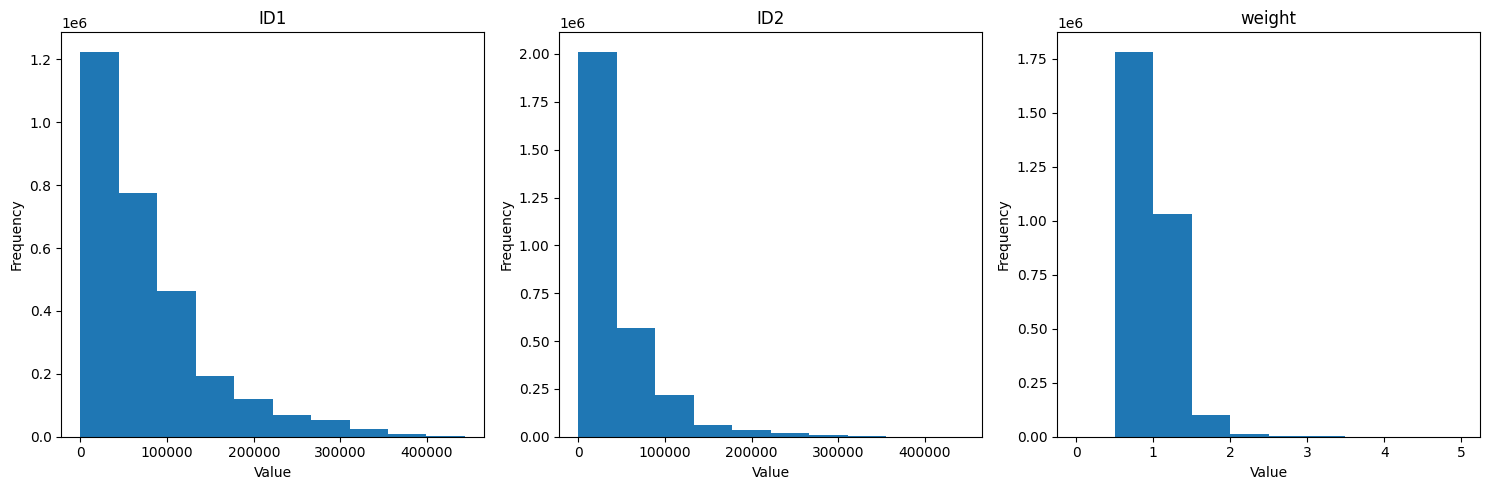

In [39]:
import matplotlib.pyplot as plt

column_stats = {
    'mean': DF.mean(),
    'mode': DF.mode().iloc[0],  # Mode can have multiple values, so we take the first one in this case
    'min': DF.min(),
    'max': DF.max()
}

# Display the statistics
print("Column Statistics:")
print(pd.DataFrame(column_stats))

# Plot the distribution of each column
fig, axes = plt.subplots(nrows=1, ncols=len(DF.columns), figsize=(15, 5))
for i, column in enumerate(DF.columns):
    axes[i].hist(DF[column], bins=10)
    axes[i].set_title(column)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

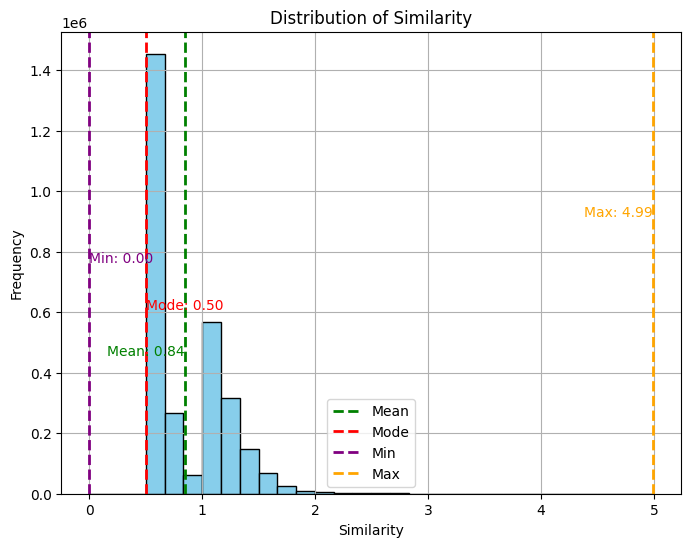

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already calculated the 'similarity' column as shown in the previous code.

# Calculate statistics
mean_similarity = DF['weight'].mean()
mode_similarity = DF['weight'].mode().iloc[0]
min_similarity = DF['weight'].min()
max_similarity = DF['weight'].max()

# Plot the distribution of the 'similarity' column
plt.figure(figsize=(8, 6))
plt.hist(DF['weight'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(mean_similarity, color='green', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mode_similarity, color='red', linestyle='dashed', linewidth=2, label='Mode')
plt.axvline(min_similarity, color='purple', linestyle='dashed', linewidth=2, label='Min')
plt.axvline(max_similarity, color='orange', linestyle='dashed', linewidth=2, label='Max')
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.title('Distribution of Similarity')
plt.legend()
plt.grid(True)

# Add text annotations for the statistics
plt.text(mean_similarity, plt.ylim()[1] * 0.30, f"Mean: {mean_similarity:.2f}", color='green', ha='right')
plt.text(mode_similarity, plt.ylim()[1] * 0.40, f"Mode: {mode_similarity:.2f}", color='red', ha='left')
plt.text(min_similarity, plt.ylim()[1] * 0.50, f"Min: {min_similarity:.2f}", color='purple', ha='left')
plt.text(max_similarity, plt.ylim()[1] * 0.60, f"Max: {max_similarity:.2f}", color='orange', ha='right')

plt.show()


In [49]:
new_DF = DF[DF['weight'] > 3]
new_DF.head()

,ID1,ID2,weight
1533,19,179004,3.033918
1580,19,144753,3.177500
4585,48,175,3.382046
7676,99,2198,3.011765
7879,104,15328,3.986919


In [50]:
new_DF.count()

ID1       1864
ID2       1864
weight    1864
dtype: int64

In [162]:
import networkx as nx
# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for _, row in new_DF.iterrows():
    G.add_edge(row['ID1'], row['ID2'], weight=row['weight'])



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Draw the directed graph
pos = nx.spring_layout(G)


In [163]:
import pandas as pd
import networkx as nx
# Create a directed graph from the edge list
g = nx.from_pandas_edgelist(DF, source='ID2', target='ID1', create_using=nx.DiGraph())



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


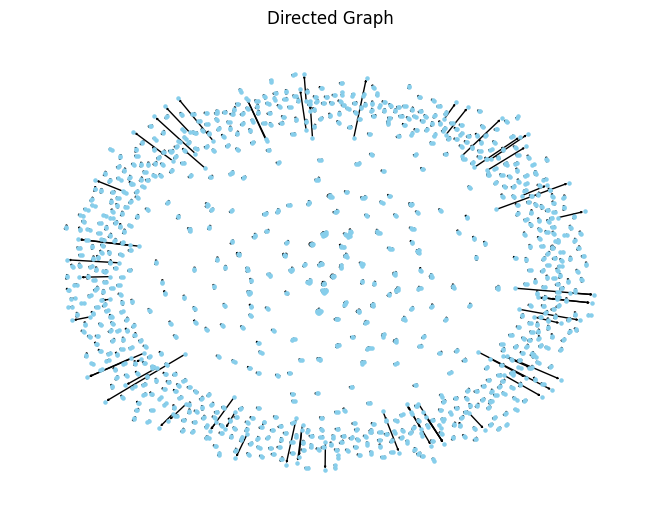

In [52]:
nx.draw(G, pos, node_size=5, node_color='skyblue', arrowsize=2)
plt.title("Directed Graph")
plt.show()

In [164]:
nodes=G.nodes()
subgraph_G = g.subgraph(nodes)
G = nx.DiGraph()

# Add nodes and edges from the existing sample_graph
G.add_nodes_from(subgraph_G.nodes())
G.add_edges_from(subgraph_G.edges())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [165]:
len(G.nodes())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1769

In [61]:
len(G.edges())

14238

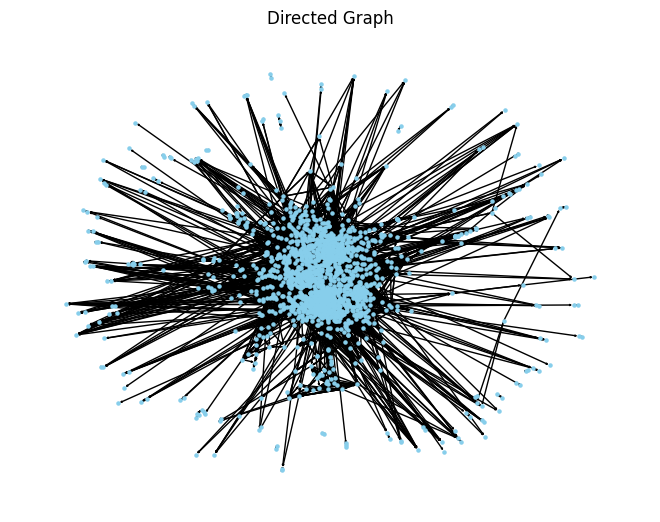

In [62]:
pos = nx.spring_layout(G)

nx.draw(G, pos, node_size=5, node_color='skyblue', arrowsize=2)
plt.title("Directed Graph")
plt.show()

In [166]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community



# Detect communities using the Louvain algorithm
communities = community.greedy_modularity_communities(G)

# Create a dictionary to store community membership for each node
Gmembership = {}
for idx, comm in enumerate(communities):
    for node in comm:
        Gmembership[node] = idx


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<ipython-input-63-859198c0fdb0>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(communities))
/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


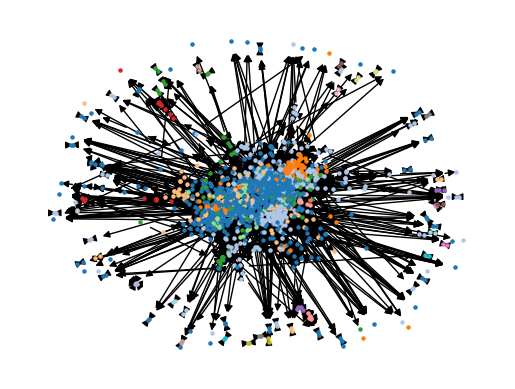

In [63]:
# Generate a list of colors for each community
colors = plt.cm.get_cmap('tab20', len(communities))

# Draw the graph with different colors for each community
pos = nx.spring_layout(G)
for node in G.nodes():
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=colors(Gmembership[node]), node_size=5)

nx.draw_networkx_edges(G, pos)
plt.axis("off")
plt.show()


In [65]:
for i in communities:
  print(len(i))

505
454
163
146
96
74
64
57
46
42
26
12
10
8
8
6
4
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


<ipython-input-66-494c8a7df051>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(Lcommunities))
/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


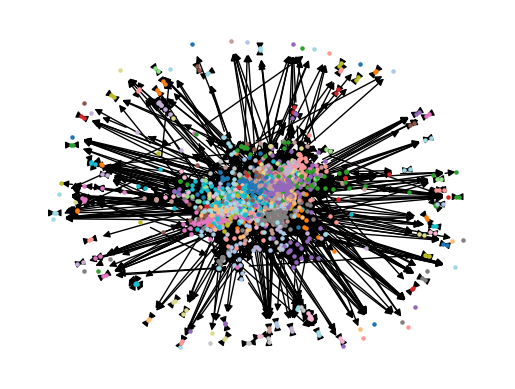

In [66]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community



# Detect communities using the Louvain algorithm
Lcommunities = community.louvain_communities(G)

# Create a dictionary to store community membership for each node
membership = {}
for idx, comm in enumerate(Lcommunities):
    for node in comm:
        membership[node] = idx

# Generate a list of colors for each community
colors = plt.cm.get_cmap('tab20', len(Lcommunities))

# Draw the graph with different colors for each community
#pos = nx.spring_layout(G)
for node in G.nodes():
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=colors(membership[node]), node_size=5)

nx.draw_networkx_edges(G, pos)
plt.axis("off")
plt.show()


In [68]:
len(Lcommunities)

197

In [167]:
# Create labeled_df DataFrame
labeled_df = pd.DataFrame({
    "ID": list(membership.keys()),
    "label": list(membership.values()),
    "gLabel":list(Gmembership.values())
})
labeled_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,label,gLabel
0,57348.0,0,0
1,29909.0,0,0
2,364439.0,0,0
3,3459.0,1,0
4,147492.0,1,0


In [75]:
label_counts = labeled_df['label'].value_counts()
label_counts

116    148
87     107
82      96
2       90
189     88
      ... 
129      2
54       2
55       2
126      2
47       2
Name: label, Length: 197, dtype: int64

In [76]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

# Assuming you have already created the merged_dict
# Convert the merged_dict to a list of lists (transactions)
transactions = list(total_dict.values())

# Initialize the TransactionEncoder
te = TransactionEncoder()
# Fit and transform the transactions using the TransactionEncoder
te_ary = te.fit(transactions).transform(transactions)
# Convert the transformed array back to a DataFrame
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)


In [77]:
# Apply the Apriori algorithm to calculate frequent itemsets 3
frequent_itemsets = apriori(df_encoded, min_support=0.003, use_colnames=True)

# Extract the item and its support value from the frequent itemsets DataFrame
frequent_items_with_support = frequent_itemsets[['itemsets', 'support']]

# Sort the frequent items by support in descending order
frequent_items_with_support = frequent_items_with_support.sort_values(by='support', ascending=False)

# Display the frequent items along with their support values (sorted by support)
frequent_items_with_support.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,itemsets,support
32,(89805),0.014862
20,(38535),0.010857
0,(492),0.007062
14,(27705),0.006008
2,(1276),0.005481
26,(62391),0.005376
12,(26158),0.005270
23,(54301),0.005165
27,(64911),0.005060
6,(9021),0.004533


In [78]:
frequent_items_with_support.count()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemsets    42
support     42
dtype: int64

In [79]:
import pandas as pd

# ... (Previous code up to 'frequent_items_with_support')

# Calculate the length of each itemset and add it as a new column 'length'
frequent_items_with_support['length'] = frequent_items_with_support['itemsets'].apply(lambda x: len(x))

# Calculate the mean and mode of the 'length' column
mean_length = frequent_items_with_support['length'].mean()
mode_length = frequent_items_with_support['length'].mode().iloc[0]

# Display the frequent items along with their support values and the calculated mean and mode of the length
print("Mean Length of Itemsets:", mean_length)
print("Mode Length of Itemsets:", mode_length)
frequent_items_with_support.head()


Mean Length of Itemsets: 1.0952380952380953
Mode Length of Itemsets: 1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,itemsets,support,length
32,(89805),0.014862,1
20,(38535),0.010857,1
0,(492),0.007062,1
14,(27705),0.006008,1
2,(1276),0.005481,1


In [80]:
import pandas as pd

# ... (Previous code up to 'frequent_items_with_support')

# Group the frequent itemsets by their lengths and calculate the count of itemsets for each length
itemsets_count_by_length = frequent_items_with_support.groupby('length').count()

# Rename the column to 'count'
itemsets_count_by_length.rename(columns={'itemsets': 'count'}, inplace=True)

# Display the itemsets count by length
itemsets_count_by_length.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,support
length,,
1,38,38
2,4,4


In [81]:
import pandas as pd

# ... (Previous code up to 'itemsets_count_by_length')

# Calculate the product of length and count and create a new column 'length_times_count'
itemsets_count_by_length['length_times_count'] = itemsets_count_by_length['count'] * itemsets_count_by_length.index

# Display the updated DataFrame
itemsets_count_by_length.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,support,length_times_count
length,,,
1,38,38,38
2,4,4,8


In [82]:
# Calculate the sum of the 'length_times_count' column
sum_length_times_count = itemsets_count_by_length['length_times_count'].sum()

# Display the sum of length_times_count
print('Sum of length_times_count:', sum_length_times_count)
print('')

Sum of length_times_count: 46



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
# Assuming you have already defined the S1 function or any other similarity function.

# Function to calculate the average similarity between all pairs of users in a set
def average_similarity(itemset, similarity_function, followers_dict):
    if len(itemset) == 1:
        return 1.0  # If the set has only 1 item, the similarity is 1

    total_similarity = 0.0
    total_pairs = 0

    # Calculate the similarity between all pairs of users in the set
    for i in itemset:
        for j in itemset:
            if i != j:
                total_similarity += combined_similarity(i,j,followers_dict,followings_dict, reply_dict,retweet_dict,mention_dict)
                total_pairs += 1

    # Calculate the average similarity
    average_sim = total_similarity / total_pairs

    return average_sim

# Assuming you have the followers_dict dictionary that contains user followers data

# Add a new column 'similarity' to the frequent_items_with_support DataFrame
frequent_items_with_support['similarity'] = frequent_items_with_support['itemsets'].apply(
    lambda itemset: average_similarity(itemset, S1, followers_dict)
)

# Display the DataFrame with the new 'similarity' column
frequent_items_with_support

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,itemsets,support,length,similarity
32,(89805),0.014862,1,1.000000
20,(38535),0.010857,1,1.000000
0,(492),0.007062,1,1.000000
14,(27705),0.006008,1,1.000000
2,(1276),0.005481,1,1.000000
26,(62391),0.005376,1,1.000000
12,(26158),0.005270,1,1.000000
23,(54301),0.005165,1,1.000000
27,(64911),0.005060,1,1.000000
6,(9021),0.004533,1,1.000000


In [85]:
# Calculate the average of the 'similarity' column when 'itemsets' length is greater than 1
average_similarity_greater_than_1 = frequent_items_with_support.loc[
    frequent_items_with_support['itemsets'].apply(len) > 1, 'similarity'
].mean()

print(f"The average similarity for itemsets with length greater than 1 is: {average_similarity_greater_than_1}")
print('')

The average similarity for itemsets with length greater than 1 is: 1.3976620443802934



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [86]:
# Calculate the average of the 'similarity' column when 'itemsets' length is greater than 1
average_similarity_greater_than_1 = frequent_items_with_support.loc[
    frequent_items_with_support['itemsets'].apply(len) > 1, 'similarity'
].min()

print(f"The min similarity for itemsets with length greater than 1 is: {average_similarity_greater_than_1}")
print('')

The min similarity for itemsets with length greater than 1 is: 0.505291934005874



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [87]:
# Calculate the average of the 'similarity' column when 'itemsets' length is greater than 1
average_similarity_greater_than_1 = frequent_items_with_support.loc[
    frequent_items_with_support['itemsets'].apply(len) > 1, 'similarity'
].max()

print(f"The max similarity for itemsets with length greater than 1 is: {average_similarity_greater_than_1}")
print('')

The max similarity for itemsets with length greater than 1 is: 1.7586856822195795



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [88]:
# Calculate the average of the 'similarity' column when 'itemsets' length is greater than 1
average_similarity_greater_than_1 = frequent_items_with_support.loc[
    frequent_items_with_support['itemsets'].apply(len) > 1, 'similarity'
].mode()

print(f"The mode of similarity for itemsets with length greater than 1 is: {average_similarity_greater_than_1}")
print('')

The mode of similarity for itemsets with length greater than 1 is: 0    0.505292
1    1.606705
2    1.719965
3    1.758686
Name: similarity, dtype: float64



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


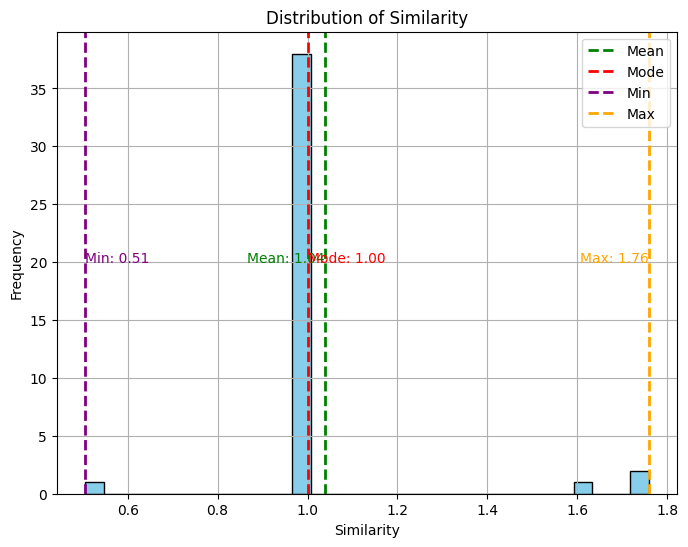

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already calculated the 'similarity' column as shown in the previous code.

# Calculate statistics
mean_similarity = frequent_items_with_support['similarity'].mean()
mode_similarity = frequent_items_with_support['similarity'].mode().iloc[0]
min_similarity = frequent_items_with_support['similarity'].min()
max_similarity = frequent_items_with_support['similarity'].max()

# Plot the distribution of the 'similarity' column
plt.figure(figsize=(8, 6))
plt.hist(frequent_items_with_support['similarity'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(mean_similarity, color='green', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mode_similarity, color='red', linestyle='dashed', linewidth=2, label='Mode')
plt.axvline(min_similarity, color='purple', linestyle='dashed', linewidth=2, label='Min')
plt.axvline(max_similarity, color='orange', linestyle='dashed', linewidth=2, label='Max')
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.title('Distribution of Similarity')
plt.legend()
plt.grid(True)

# Add text annotations for the statistics
plt.text(mean_similarity, plt.ylim()[1] * 0.50, f"Mean: {mean_similarity:.2f}", color='green', ha='right')
plt.text(mode_similarity, plt.ylim()[1] * 0.50, f"Mode: {mode_similarity:.2f}", color='red', ha='left')
plt.text(min_similarity, plt.ylim()[1] * 0.50, f"Min: {min_similarity:.2f}", color='purple', ha='left')
plt.text(max_similarity, plt.ylim()[1] * 0.50, f"Max: {max_similarity:.2f}", color='orange', ha='right')

plt.show()


In [90]:
def similarity(itemset):
    max_similarity = 0
    min_similarity_item = None
    total_similarity = 0.0
    total_pairs = 0
    for i in itemset:
        for j in itemset:
            if i != j:  # Avoid comparing the same item
                similarity = combined_similarity(i,j,followers_dict,followings_dict, reply_dict,retweet_dict,mention_dict)
                total_similarity +=similarity
                total_pairs += 1

                if similarity > max_similarity:
                    max_similarity = similarity
                    max_sim_itemss=(j,i)

                if min_similarity_item is None or similarity < min_similarity_item[2]:
                    min_similarity_item = (j,i, similarity)
    average_sim = total_similarity / total_pairs

    return average_sim,max_similarity, min_similarity_item,max_sim_itemss


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [91]:
import pandas as pd
single_items=[]
removed_items=[]
groups=[]
sets=[]
similarity_treshold=1
deleted_set=[]
# Loop over the rows and print the values in the 'itemsets' column
for index, row in frequent_items_with_support.iterrows():

    itemset_value = row['itemsets']
    itemset=set(itemset_value)
    sets.append(itemset)
    if len(itemset)==1: #=1
      single_items.append(itemset)
    elif len(itemset)==2: #=2
      average_sim,max_sim, min_sim_item,_=similarity(itemset)
      if average_sim>= similarity_treshold:
        groups.append(itemset)
      else:
        deleted_set.append(itemset)
    else: #>2
      print(itemset)
      average_sim,max_sim, min_sim_item,max_items=similarity(itemset)
      print(average_sim)
      print(itemset)
      print(max_sim)
      if average_sim>= similarity_treshold:
        groups.append(itemset)
      else:
        if max_sim<similarity_treshold:
          deleted_set.append(itemset)

        elif max_sim>=similarity_treshold:
          min_item=list(min_sim_item)
          new_set = set(itemset)
          max_items=list(max_items)
          while average_sim < similarity_treshold and len(new_set)!=2:
            print(new_set)
            if min_item[0] not in max_items :
              new_set.remove(min_item[0])
              removed_items.append(min_item[0])
              average_sim,max_sim, min_item,max_items=similarity(new_set)
              max_items=list(max_items)
              min_item=list(min_item)
            elif min_item[1] not in max_items :
              new_set.remove(min_item[1])
              removed_items.append(min_item[1])
              average_sim,max_sim, min_item,max_items=similarity(new_set)
              max_items=list(max_items)
              min_item=list(min_item)
            #if len(new_set)
          groups.append(new_set)
          print(new_set)
          print('')

#print(groups)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [92]:
print(single_items)


[{89805}, {38535}, {492}, {27705}, {1276}, {62391}, {26158}, {54301}, {64911}, {9021}, {51181}, {6940}, {80101}, {35375}, {35376}, {149922}, {14957}, {103447}, {69127}, {15439}, {511}, {44086}, {12751}, {35729}, {108150}, {6241}, {98204}, {13820}, {62195}, {4665}, {33833}, {56426}, {16970}, {110903}, {74295}, {67382}, {29542}, {27311}]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [93]:
print(removed_items)


[]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [94]:
print(groups)

[{89805, 64911}, {35729, 89805}, {89805, 110903}]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [95]:
print(deleted_set)

[{89805, 26158}]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [96]:
print(sets)

[{89805}, {38535}, {492}, {27705}, {1276}, {62391}, {26158}, {54301}, {64911}, {9021}, {51181}, {6940}, {80101}, {35375}, {35376}, {149922}, {14957}, {103447}, {69127}, {15439}, {511}, {44086}, {12751}, {35729}, {89805, 64911}, {108150}, {6241}, {98204}, {13820}, {62195}, {4665}, {33833}, {35729, 89805}, {56426}, {16970}, {110903}, {74295}, {67382}, {89805, 26158}, {29542}, {27311}, {89805, 110903}]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [97]:
# Get the list of unique items by converting sets to a list of items and then flattening the list
all_items = [item for itemset in sets for item in itemset] #0.00094
unique_items = list(set(all_items))

item_support = {item: all_items.count(item) / len(df_encoded) for item in unique_items}
# Set the threshold for support (e.g., 0.1)
threshold = 0.005

# Filter out items with support above the threshold
output_list = [item for item, support in item_support.items() if support > threshold]

print("Support for each item:")
print(item_support)

print("Items with support above the threshold ({}):".format(threshold))
print(output_list)

Support for each item:
{38535: 0.00010540739959945188, 69127: 0.00010540739959945188, 64911: 0.00021081479919890376, 35729: 0.00021081479919890376, 103447: 0.00010540739959945188, 6940: 0.00010540739959945188, 54301: 0.00010540739959945188, 98204: 0.00010540739959945188, 13820: 0.00010540739959945188, 149922: 0.00010540739959945188, 33833: 0.00010540739959945188, 26158: 0.00021081479919890376, 35375: 0.00010540739959945188, 35376: 0.00010540739959945188, 27311: 0.00010540739959945188, 44086: 0.00010540739959945188, 62391: 0.00010540739959945188, 110903: 0.00021081479919890376, 27705: 0.00010540739959945188, 4665: 0.00010540739959945188, 74295: 0.00010540739959945188, 67382: 0.00010540739959945188, 9021: 0.00010540739959945188, 16970: 0.00010540739959945188, 89805: 0.0005270369979972594, 15439: 0.00010540739959945188, 12751: 0.00010540739959945188, 6241: 0.00010540739959945188, 80101: 0.00010540739959945188, 29542: 0.00010540739959945188, 56426: 0.00010540739959945188, 492: 0.0001054073

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [98]:
import pandas as pd

# Generate similarity values for all pairs of unique items
similarity_values = {}
for item1 in unique_items:
    similarity_values[item1] = {}
    for item2 in unique_items:
        similarity_values[item1][item2] = combined_similarity(item1,item2,followers_dict,followings_dict, reply_dict,retweet_dict,mention_dict)

# Create a DataFrame from the similarity values dictionary
similarity_df = pd.DataFrame.from_dict(similarity_values, orient='index')

# Display the resulting DataFrame
similarity_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,38535,69127,64911,35729,103447,6940,54301,98204,13820,149922,...,80101,29542,56426,492,51181,14957,62195,108150,1276,511
38535,0.000000,0.332133,0.058571,0.066576,0.080456,0.340313,1.424310,0.053384,0.020943,0.0,...,0.074653,0.134694,0.385507,0.083879,0.174541,0.124502,0.395049,0.646442,0.063209,0.113824
69127,0.332133,0.000000,0.044756,0.077913,0.048525,1.065574,0.139043,0.071373,0.007194,0.0,...,0.075309,0.092112,1.678868,0.003091,0.093136,0.076603,0.379573,0.438550,0.074646,0.121966
64911,0.058571,0.044756,0.000000,1.645026,2.042740,0.188397,0.115325,1.491895,0.233069,0.0,...,0.449374,0.217505,0.146603,0.677396,0.169093,0.790262,0.119933,0.034503,0.732212,0.281929
35729,0.066576,0.077913,1.645026,0.000000,1.675586,0.148156,0.209069,0.441654,0.232426,0.0,...,0.379089,0.162894,0.207542,1.199442,0.367736,1.383093,0.145738,0.033615,0.795970,1.682114
103447,0.080456,0.048525,2.042740,1.675586,0.000000,0.131845,0.149035,1.765912,0.141574,0.0,...,0.902702,0.195172,0.149396,0.068142,0.178523,0.277468,0.150002,0.059844,0.155809,0.119083


In [99]:
# Sample function to calculate similarity
def calculate_similarity(itemset):
    max_similarity = 0
    min_similarity_item = None
    total_similarity = 0.0
    total_pairs = 0
    for i in itemset:
        for j in itemset:
            if i != j:  # Avoid comparing the same item
                similarity = combined_similarity(i,j,followers_dict,followings_dict, reply_dict,retweet_dict,mention_dict)
                total_similarity += similarity
                total_pairs += 1

                if similarity > max_similarity:
                    max_similarity = similarity
                    max_sim_itemss = (j, i)

                if min_similarity_item is None or similarity < min_similarity_item[2]:
                    min_similarity_item = (j, i, similarity)
    average_sim = total_similarity / total_pairs

    return average_sim, max_similarity, min_similarity_item, max_sim_itemss


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


agglomerative

In [100]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

# Generate similarity values for all pairs of unique items
similarity_values = {}
for item1 in unique_items:
    similarity_values[item1] = {}
    for item2 in unique_items:
        similarity_values[item1][item2] = 6-combined_similarity(item1,item2,followers_dict,followings_dict, reply_dict,retweet_dict,mention_dict)

# Create a DataFrame from the similarity values dictionary
similarity_df = pd.DataFrame.from_dict(similarity_values, orient='index')

# Define the similarity threshold for clustering
threshold = 5.7  # You can set the threshold based on your specific requirements

# Perform Agglomerative Hierarchical Clustering with the specified threshold
clustering = AgglomerativeClustering(n_clusters=None, affinity='precomputed', linkage='average', distance_threshold=threshold)
cluster_labels = clustering.fit_predict(similarity_df)

# Create a dictionary to store the groups of items
item_groups = {}
for item, cluster_label in zip(unique_items, cluster_labels):
    if cluster_label not in item_groups:
        item_groups[cluster_label] = []
    item_groups[cluster_label].append(item)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [101]:
# Create a dictionary to store the groups of items and their similarities
item_groups = {}
for item, cluster in zip(unique_items, cluster_labels):
    if cluster not in item_groups:
        item_groups[cluster] = {'items': [], 'similarities': []}
    item_groups[cluster]['items'].append(item)

# Compute average similarity for each group
for cluster in item_groups.values():
    items = cluster['items']
    similarities = [combined_similarity(item1,item2,followers_dict,followings_dict, reply_dict,retweet_dict,mention_dict) for item1 in items for item2 in items]
    avg_similarity = sum(similarities) / len(similarities)
    cluster['similarities'] = avg_similarity

# Print the groups of items and their average similarities
item_groups

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{5: {'items': [38535, 54301], 'similarities': 0.712155208553992},
 0: {'items': [69127,
   6940,
   33833,
   35375,
   35376,
   27705,
   9021,
   56426,
   62195,
   108150],
  'similarities': 0.6799931540169727},
 2: {'items': [64911,
   35729,
   103447,
   98204,
   13820,
   26158,
   27311,
   62391,
   110903,
   4665,
   67382,
   89805,
   15439,
   12751,
   6241,
   80101,
   29542,
   492,
   51181,
   14957,
   1276,
   511],
  'similarities': 0.6062503827604815},
 3: {'items': [149922], 'similarities': 0.0},
 6: {'items': [44086], 'similarities': 0.0},
 4: {'items': [74295], 'similarities': 0.0},
 1: {'items': [16970], 'similarities': 0.0}}

In [102]:
list_of_sets=[]
for cluster in item_groups.values():
  list_of_sets.append(set(cluster['items']))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [103]:
communities=list_of_sets
print(communities)

[{54301, 38535}, {69127, 33833, 56426, 35375, 35376, 62195, 108150, 27705, 6940, 9021}, {64911, 35729, 1276, 103447, 98204, 26158, 27311, 67382, 62391, 110903, 4665, 89805, 15439, 12751, 6241, 80101, 29542, 492, 51181, 14957, 13820, 511}, {149922}, {44086}, {74295}, {16970}]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [104]:
import pandas as pd

# Assuming you already have your dataframe named 'DF'
# If not, create it with your data

# Extract unique values from ID1 and ID2
unique_values_id1 = DF['ID1'].unique()
unique_values_id2 = DF['ID2'].unique()

# Concatenate and sort the unique values
unique_values = sorted(set(unique_values_id1) | set(unique_values_id2))

# Create a new dataframe with the unique values
new_df = pd.DataFrame({'ID': unique_values, 'cluster': None})

# Display the new dataframe
new_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,cluster
0,1,None
1,2,None
2,3,None
3,4,None
4,5,None


In [105]:
# Create a dictionary to store the cluster assignments for each ID
id_to_cluster = {}
for cluster_idx, cluster in enumerate(communities):
    for item in cluster:
        id_to_cluster[item] = f'cluster{cluster_idx + 1}'

# Update the 'cluster' column in the 'new_df' DataFrame
new_df['cluster'] = new_df['ID'].map(id_to_cluster)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [106]:
cluster_counts = new_df['cluster'].value_counts()

cluster_counts.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


cluster3    22
cluster2    10
cluster1     2
cluster7     1
cluster5     1
cluster6     1
cluster4     1
Name: cluster, dtype: int64

In [107]:
new_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,cluster
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN


In [108]:
cluster_names = {idx: f'cluster{idx+1}' for idx, comm in enumerate(communities)}
cluster_names

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{0: 'cluster1',
 1: 'cluster2',
 2: 'cluster3',
 3: 'cluster4',
 4: 'cluster5',
 5: 'cluster6',
 6: 'cluster7'}

In [109]:
from tqdm import tqdm

# communities is a list of lists containing the IDs of each community
# For example, communities = [['ID1', 'ID2', ...], ['ID3', 'ID4', ...], ...]

# Create a dictionary to map community index to cluster name
cluster_names = {idx: f'cluster{idx+1}' for idx, comm in enumerate(communities)}

# Get the total number of records in new_df
total_records = len(new_df)

# Create a progress bar using tqdm
progress_bar = tqdm(total=total_records, desc="Processing", unit="record", dynamic_ncols=True)

# Loop over new_df and update the 'cluster' column using the community names
for index, row in new_df.iterrows():
    max_similarity = 0
    max_cluster = None

    # Calculate similarity for each cluster and find the cluster with the max similarity
    for cluster_num, cluster_list in enumerate(communities):
        for cluster_id in cluster_list:
            # sim = similarity(row['ID'], cluster_id)
            sim = combined_similarity(row['ID'], cluster_id, followers_dict, followings_dict, reply_dict, retweet_dict, mention_dict)

            if sim > max_similarity:
                max_similarity = sim
                max_cluster = cluster_num

    # If the max_cluster is not None, assign the corresponding cluster name to the 'cluster' column
    if max_cluster is not None:
        cluster_name = cluster_names[max_cluster]
        new_df.at[index, 'cluster'] = cluster_name

    # Update the progress bar for every 1000 records
    if index % 1000 == 0:
        progress_bar.update(1000)
        progress_bar.set_description(f"Processing ({index}/{total_records})")
        progress_bar.refresh()

# Close the progress bar
progress_bar.close()

# Print the final dataframe
new_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Processing (45000/45756): : 46000record [03:40, 209.02record/s]


,ID,cluster
0,1,cluster1
1,2,cluster3
2,3,cluster3
3,4,cluster3
4,5,cluster3


In [111]:
import pandas as pd

# Assuming you have already created the 'new_df' DataFrame as shown in the previous code
# and filled NaN values with 0

# Group the DataFrame by the 'cluster' column and count the occurrences of each cluster
cluster_counts = new_df.groupby('cluster').count()

# Get the counts for 'cluster1' and 'cluster2'
count_cluster1 = cluster_counts.loc['cluster1', 'ID']
count_cluster2 = cluster_counts.loc['cluster2', 'ID']
count_cluster3 = cluster_counts.loc['cluster3', 'ID']
count_cluster4 = cluster_counts.loc['cluster4', 'ID']
count_cluster5 = cluster_counts.loc['cluster5', 'ID']
count_cluster6 = cluster_counts.loc['cluster6', 'ID']
count_cluster7 = cluster_counts.loc['cluster7', 'ID']

# Get the summation of counts for 'cluster1' and 'cluster2'
summation = count_cluster1 + count_cluster2+count_cluster3+count_cluster4 + count_cluster5+count_cluster6 + count_cluster7

# Display the counts and the summation
print(f"Count in cluster1: {count_cluster1}")
print(f"Count in cluster2: {count_cluster2}")
print(f"Count in cluster3: {count_cluster3}")
print(f"Count in cluster4: {count_cluster4}")
print(f"Count in cluster5: {count_cluster5}")
print(f"Count in cluster6: {count_cluster6}")
print(f"Count in cluster7: {count_cluster7}")
print(f"Summation: {summation}")


Count in cluster1: 2453
Count in cluster2: 17233
Count in cluster3: 18834
Count in cluster4: 2144
Count in cluster5: 1426
Count in cluster6: 862
Count in cluster7: 1967
Summation: 44919


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [112]:
cluster_counts = new_df['cluster'].value_counts()

cluster_counts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


cluster3    18834
cluster2    17233
cluster1     2453
cluster4     2144
cluster7     1967
cluster5     1426
cluster6      862
Name: cluster, dtype: int64

In [113]:
import pandas as pd

# Assuming you have your DataFrame named 'new_df'
# If not, replace 'new_df' with the actual name of your DataFrame

# Check if any column has NaN value
has_nan = new_df.isna().any()

# Print the result
has_nan

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ID         False
cluster     True
dtype: bool

In [114]:
nan_counts = new_df.isna().sum()
nan_counts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ID           0
cluster    837
dtype: int64

In [115]:
import pandas as pd
import networkx as nx
def new_combined_similarity(ID1, ID2, followers_dict,followings_dict, reply_dict,retweet_dict,mention_dict,graph):

    sc1 = S1(ID1, ID2, followers_dict)+nx.shortest_path_length(graph, source=ID1, target=ID2)
    sc2 = s2(ID1, ID2, followings_dict)
    sc3 = s3(ID1, ID2, followers_dict)
    sc4 = S4(ID1, ID2, mention_dict)
    sc5 = S5(ID1, ID2, reply_dict)
    sc6 = S6(ID1, ID2, retweet_dict)

    combined_score = sc1 + sc2 + sc3 + sc4 + sc5 + sc6
    return combined_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [116]:
import pandas as pd

# Assuming you have your DataFrame named 'new_df'
# If not, replace 'new_df' with the actual name of your DataFrame

# Extract rows with NaN values in the entire DataFrame
nan_df = new_df[new_df.isna().any(axis=1)]

# Print the new DataFrame
nan_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,cluster
772,1074,NaN
1114,1592,NaN
1144,1704,NaN
1716,2783,NaN
1739,2866,NaN
...,...,...
45718,411068,NaN
45724,415617,NaN
45727,416294,NaN
45732,419195,NaN


In [117]:
unique_ids = nan_df['ID'].unique()
print(unique_ids)

[  1074   1592   1704   2783   2866   2895   2920   3427   3707   3909
   6486   7811  10692  10858  14090  14345  16964  19464  19577  19908
  20136  20275  20513  21489  22157  23249  25901  27410  28926  29655
  29740  30695  31684  32581  32848  33156  33769  34070  34076  34879
  36816  37140  37324  38208  39337  39415  40490  40585  41443  41444
  41482  42246  44318  45016  45235  45499  45769  45775  45903  45921
  45922  46201  46253  48185  49029  49385  49742  51056  51747  52124
  52841  53039  54221  55315  55327  55685  56033  56105  56392  56840
  57024  57108  58947  59286  59625  60470  60804  61321  62109  62392
  62636  63506  63838  64693  64702  65357  65419  66699  66889  67205
  67235  67549  67929  68462  68663  68697  68911  68940  69043  69522
  69827  69834  70044  70398  70955  71061  71082  71594  71712  71714
  71716  71872  72030  72572  72652  72933  72951  72989  73379  74406
  75546  76865  77135  78917  79018  79093  79233  80474  80477  81016
  8221

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [118]:
import pandas as pd
import networkx as nx

# Replace the path with the correct one if needed
file_path = '/content/drive/MyDrive/Subgraph.csv'

# Read the file into a DataFrame
DF = pd.read_csv(file_path)

# Create a directed graph from the edge list
G = nx.from_pandas_edgelist(DF, source='ID1', target='ID2', create_using=nx.DiGraph())



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [119]:
from tqdm import tqdm

# communities is a list of lists containing the IDs of each community
# For example, communities = [['ID1', 'ID2', ...], ['ID3', 'ID4', ...], ...]

# Create a dictionary to map community index to cluster name
cluster_names = {idx: f'cluster{idx+1}' for idx, comm in enumerate(communities)}



# Loop over new_df and update the 'cluster' column using the community names
for index, row in new_df.iterrows():
  if row['cluster'] is None:
        # Create a dictionary to store the score for each cluster
        cluster_scores = {}

        # Find the neighbors using the 'ID' of the current row
        neighbors = DF.loc[DF['ID1'] == row['ID'], 'ID2'].tolist()

        # Calculate similarity score for each neighbor and cluster
        for neighbor_id in neighbors:
            for cluster_num, cluster_list in enumerate(communities):
                for cluster_id in cluster_list:
                    sim = combined_similarity(neighbor_id, cluster_id, followers_dict, followings_dict, reply_dict, retweet_dict, mention_dict)
                    #similarity(neighbor_id, cluster_id)

                    # Add the similarity score to the corresponding cluster
                    if cluster_num in cluster_scores:
                        cluster_scores[cluster_num] += sim
                    else:
                        cluster_scores[cluster_num] = sim
        if neighbors==[]:
          new_df.at[index, 'cluster'] = 'isolated'
          print('no neighbour')
        else:
          # Find the cluster with the highest score
          max_cluster = max(cluster_scores, key=cluster_scores.get)

          # Assign the cluster with the highest score to the 'cluster' column for the current row
          new_df.at[index, 'cluster'] = f'cluster{max_cluster+1}'
# Print the final dataframe
new_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,cluster
0,1,cluster1
1,2,cluster3
2,3,cluster3
3,4,cluster3
4,5,cluster3


In [120]:
cluster_counts = new_df['cluster'].value_counts()

cluster_counts.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


cluster3    18834
cluster2    17233
cluster1     2453
cluster4     2144
cluster7     1967
cluster5     1426
cluster6      862
Name: cluster, dtype: int64

In [121]:
new_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,cluster
0,1,cluster1
1,2,cluster3
2,3,cluster3
3,4,cluster3
4,5,cluster3


In [122]:
labeled_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,label
0,57348.0,0
1,29909.0,0
2,364439.0,0
3,3459.0,1
4,147492.0,1


In [168]:
labeled_df = pd.merge(labeled_df, new_df, on="ID", how="left")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [169]:
labeled_df.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,label,gLabel,cluster
0,57348.0,0,0,cluster2
1,29909.0,0,0,cluster3
2,364439.0,0,0,cluster3
3,3459.0,1,0,cluster1
4,147492.0,1,0,cluster7
5,88220.0,1,0,cluster7
6,200270.0,1,0,cluster1
7,3279.0,1,0,cluster3
8,99076.0,2,0,cluster2
9,56071.0,2,0,cluster2


In [170]:
labeled_df.to_csv("/content/drive/MyDrive/labeled_df.csv", index=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [175]:
new_df.to_csv("/content/drive/MyDrive/new_df.csv", index=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [171]:
community_counts = labeled_df.groupby('label')['ID'].size()
community_counts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


label
0       3
1       5
2      90
3       2
4       2
       ..
192     2
193     2
194     2
195     2
196     3
Name: ID, Length: 197, dtype: int64

In [172]:
unique_clusters_count = labeled_df.groupby(['label','cluster']).nunique()
unique_clusters_count

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ID  gLabel
label cluster             
0     cluster2   1       1
      cluster3   2       1
1     cluster1   2       1
      cluster3   1       1
      cluster7   2       1
...             ..     ...
194   cluster2   1       1
      cluster5   1       1
195   cluster3   2       2
196   cluster3   2       2
      cluster5   1       1

[386 rows x 2 columns]

In [173]:
unique_clusters_count.to_csv("/content/drive/MyDrive/unique_clusters_count.csv", index=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [174]:
unique_clusters_count.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ID  gLabel
label cluster             
0     cluster2   1       1
      cluster3   2       1
1     cluster1   2       1
      cluster3   1       1
      cluster7   2       1
2     cluster1   1       1
      cluster2  86       1
      cluster3   1       1
3     cluster2   1       1
      cluster3   1       1
4     cluster3   1       1
      cluster4   1       1
5     cluster2   4       1
6     cluster2   3       1
7     cluster3   1       1
8     cluster2   2       1
      cluster5   1       1
9     cluster2   2       1
      cluster5   1       1
10    cluster2   3       1

In [156]:
Lcommunities_frozen = [frozenset(comm) for comm in Lcommunities]

# Loop through each community and print the clusters for each node in the community
for i in Lcommunities_frozen:
    print(f"Community {i}:")
    L=len(i)
    for j in i:
        cluster = labeled_df.loc[labeled_df['ID'] == j, 'cluster'].values[0]
        label = labeled_df.loc[labeled_df['ID'] == j, 'label'].values[0]
        print(f"Node {j} - Cluster {cluster}")
        print(label)
    for k in dictonary: #یه دیکشنری که هر کلیدش یه کلاستر پیدا شده توی اون جامعه است و ههر مقدر برای اون کلید نشون دهنده تعداد اون کلیده توی جامعه
      #بعد اینجا قراره اف مژر و معیار های دیگه برای هر جامعه محاسبه بشه
    print()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Community frozenset({57348.0, 29909.0, 364439.0}):
Node 57348.0 - Cluster cluster2
0
Node 29909.0 - Cluster cluster3
0
Node 364439.0 - Cluster cluster3
0

Community frozenset({3459.0, 147492.0, 88220.0, 200270.0, 3279.0}):
Node 3459.0 - Cluster cluster1
1
Node 147492.0 - Cluster cluster7
1
Node 88220.0 - Cluster cluster7
1
Node 200270.0 - Cluster cluster1
1
Node 3279.0 - Cluster cluster3
1

Community frozenset({99076.0, 56071.0, 56072.0, 60169.0, 61448.0, 284938.0, 14604.0, 196621.0, 265484.0, 281616.0, 105232.0, 102418.0, 308504.0, 319003.0, 4893.0, 99101.0, 14625.0, 35114.0, 4909.0, 4911.0, 61743.0, 28465.0, 21041.0, 61233.0, 57393.0, 282166.0, 99133.0, 34622.0, 33601.0, 39497.0, 40266.0, 40272.0, 59985.0, 59987.0, 14683.0, 39517.0, 27744.0, 39522.0, 82276.0, 40293.0, 40297.0, 57452.0, 31086.0, 99183.0, 58736.0, 128367.0, 40305.0, 33650.0, 62578.0, 69748.0, 86385.0, 117103.0, 135800.0, 40312.0, 40313.0, 57466.0, 40325.0, 67719.0, 40328.0, 55950.0, 128144.0, 57499.0, 55963.0, 168093.0